In [1]:
'''This notebook implements the Stochastic Gradient Descent classifier on
    1. The linear dataset
    2. The standardized linear dataset
    3. The standardized expanded dataset
    4. Optimal features selected from the expanded dataset'''

__author__ = 'Anjana Niranjan'
__email__ = 'anjanani@usc.edu'

**Stochastic gradient descent**
Thanks to the sklearn website for examples on the functions used in this code.
Thanks to https://stackoverflow.com/questions/51194627/python-naive-bayes-with-cross-validation-using-gaussiannb-classifier for helping with cross-validation.

In [2]:
#Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
#Loading data
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mpr/linearTrain.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mpr/linearTest.csv')

In [4]:
X_train = train.iloc[:, 1:14]
y_train = train.iloc[:,14]
X_test = test.iloc[:, 1:14]
y_test = test.iloc[:, 14]

Implementing the SGD classifier on the data by selecting the best parameters through grid search with cross validation

In [5]:
#Splitting data into 9 folds for cross validation
kf = KFold(n_splits=9, random_state=None, shuffle=False)

#Defining parameters for the SGD Classifier
params = {'loss':['hinge', 'log', 'modified_huber'], 'penalty':['l1', 'l2', 'elasticnet'], 'alpha': [0.1, 0.05, 0.001]}
clf = SGDClassifier()

#Selecting the most optimal set of parameters
gs = GridSearchCV(clf, cv=kf, param_grid=params, return_train_score=True)

#Training the model
gs.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

GridSearchCV(cv=KFold(n_splits=9, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.05, 0.001],
                         'loss': ['hinge', 'log', 'modified_huber'],
                       

In [6]:
#Visualizing the results of the different runs and cross validation
gs.cv_results_

{'mean_fit_time': array([4.88269366, 0.23129312, 0.35155728, 8.48766878, 0.32676429,
        0.39483921, 5.9396433 , 0.39948826, 0.56472254, 4.76868131,
        0.29030988, 0.41352773, 8.37534936, 0.40690615, 0.49437523,
        5.79380865, 0.49674996, 0.6982033 , 3.59309406, 0.49459185,
        0.76825942, 4.55587588, 1.13878269, 1.41840659, 3.41597687,
        0.54346715, 0.85712255]),
 'mean_score_time': array([0.0026101 , 0.00162625, 0.00159009, 0.00214076, 0.00157611,
        0.00156654, 0.0020708 , 0.0015805 , 0.00158702, 0.00213432,
        0.00159963, 0.00161121, 0.00215589, 0.00156331, 0.00163799,
        0.00213215, 0.00162111, 0.00164755, 0.00213154, 0.00160612,
        0.00160185, 0.00209339, 0.00160162, 0.00159666, 0.00209668,
        0.00157825, 0.00157915]),
 'mean_test_score': array([0.68748148, 0.77525926, 0.77977778, 0.66422222, 0.79051852,
        0.80155556, 0.74103704, 0.79562963, 0.83585185, 0.72592593,
        0.80066667, 0.78637037, 0.70555556, 0.81355556, 0.778

In [7]:
#The best estimator obtained by grid search
gs.best_estimator_

SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='modified_huber', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
#The best parameters
gs.best_params_

{'alpha': 0.1, 'loss': 'modified_huber', 'penalty': 'elasticnet'}

In [9]:
#The best score
gs.best_score_

0.8358518518518518

In [10]:
#Running the classifier with best parameters on train data
bestclf = SGDClassifier(alpha= 0.1, loss= 'modified_huber', penalty= 'elasticnet')
bestclf.fit(X_train, y_train)
tr_p = bestclf.predict(X_train)
print(accuracy_score(y_train, tr_p))
confusion_matrix(y_train, tr_p)

0.9527407407407408


array([[2770,    0,    2,    6,    6],
       [   5, 2313,    8,   30,  226],
       [   9,   12, 2416,  124,   88],
       [   5,   29,    4, 2435,    3],
       [   1,   78,    0,    2, 2928]])

In [11]:
#Running the classifier with best parameters on test data
predictions = bestclf.predict(X_test)
print(accuracy_score(y_test, predictions))
confusion_matrix(y_test, predictions)

0.9013223375515427


array([[4182,   48,   80,    5,  151],
       [   0, 4267,   31,  104,    0],
       [   5,  330, 4223,  221,    0],
       [   0,  914,    1, 2984,   15],
       [   0,   31,    0,  146, 3361]])

Running SGD on Normalized data

In [12]:
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [13]:
kf = KFold(n_splits=9, random_state=None, shuffle=False)
params = {'loss':['hinge', 'log', 'modified_huber'], 'penalty':['l1', 'l2', 'elasticnet'], 'alpha': [0.1, 0.05, 0.001]}
clf = SGDClassifier()
gs = GridSearchCV(clf, cv=kf, param_grid=params, return_train_score=True)

gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=9, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.05, 0.001],
                         'loss': ['hinge', 'log', 'modified_huber'],
                       

In [14]:
#Result of grid search
gs.cv_results_

{'mean_fit_time': array([0.09301114, 0.0563989 , 0.09673145, 0.15190797, 0.11138956,
        0.13686678, 0.19580939, 0.07068348, 0.11695928, 0.10166462,
        0.05608802, 0.09329526, 0.14596992, 0.11135793, 0.13750116,
        0.24601769, 0.08058601, 0.13465635, 0.16634295, 0.08431957,
        0.13476833, 0.22949796, 0.141501  , 0.16993878, 0.7500538 ,
        0.16032227, 0.27049637]),
 'mean_score_time': array([0.00099688, 0.00102388, 0.00105023, 0.00082649, 0.00098297,
        0.00081637, 0.00083457, 0.00104573, 0.00097508, 0.00102133,
        0.00112012, 0.00108753, 0.00082559, 0.00109214, 0.00083595,
        0.00082808, 0.00104417, 0.0008587 , 0.00084917, 0.0010598 ,
        0.00080951, 0.00085473, 0.00081693, 0.00084072, 0.00085542,
        0.00082472, 0.00087704]),
 'mean_test_score': array([0.55666667, 0.85681481, 0.85622222, 0.7857037 , 0.81192593,
        0.81140741, 0.86459259, 0.88148148, 0.88074074, 0.82274074,
        0.86303704, 0.8677037 , 0.8417037 , 0.81777778, 0.817

In [15]:
#Best parameters obtained from grid search
gs.best_params_

{'alpha': 0.05, 'loss': 'modified_huber', 'penalty': 'l2'}

In [16]:
#Best score
gs.best_score_

0.9128888888888889

In [17]:
#Training the classifier with best parameter
bestclf = SGDClassifier(alpha= 0.05, loss= 'modified_huber', penalty= 'l2')
bestclf.fit(X_train, y_train)
tr_p = bestclf.predict(X_train)
print(accuracy_score(y_train, tr_p))
confusion_matrix(y_train, tr_p)

0.9660740740740741


array([[2770,    0,   10,    0,    4],
       [   5, 2433,    7,   60,   77],
       [   9,    0, 2483,  134,   23],
       [   1,   20,   19, 2429,    7],
       [   1,   58,    3,   20, 2927]])

In [18]:
#Running the model on the test set
predictions = bestclf.predict(X_test)
print(accuracy_score(y_test, predictions))
confusion_matrix(y_test, predictions)

0.8776245319683398


array([[4298,   48,   43,    0,   77],
       [  39, 4198,   60,  105,    0],
       [ 954,    1, 3729,    5,   90],
       [   0,  777,   17, 2987,  133],
       [  19,   18,   10,  186, 3305]])

In [19]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

In [20]:
#Loading expanded dataset
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mpr/linearTrainexpanded.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mpr/linearTestexpanded.csv')

In [21]:
X_train = train.iloc[:, 1:60]
y_train = train.iloc[:,60]
X_test = test.iloc[:, 1:60]
y_test = test.iloc[:, 60]

In [22]:
#Normalizing the data
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [23]:
kf = KFold(n_splits=9, random_state=None, shuffle=False)
params = {'loss':['hinge', 'log', 'modified_huber'], 'penalty':['l1', 'l2', 'elasticnet'], 'alpha': [0.1, 0.05, 0.001]}
clf = SGDClassifier()
gs = GridSearchCV(clf, cv=kf, param_grid=params, return_train_score=True)

gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=9, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.05, 0.001],
                         'loss': ['hinge', 'log', 'modified_huber'],
                       

In [24]:
#Visualizing results of grid search
gs.cv_results_

{'mean_fit_time': array([0.33609287, 0.1236736 , 0.24461044, 0.42760187, 0.1951925 ,
        0.36277946, 1.88350662, 0.29358588, 0.7139061 , 0.27381849,
        0.12466023, 0.24160147, 0.3999868 , 0.19116092, 0.35051073,
        1.80638088, 0.38242483, 0.94280876, 0.57371407, 0.23757633,
        0.50755572, 0.9093944 , 0.38227654, 0.64989816, 3.37193113,
        1.05523242, 2.64132531]),
 'mean_score_time': array([0.00216757, 0.00209374, 0.00217255, 0.00231157, 0.00208386,
        0.00213464, 0.00239306, 0.00215358, 0.00214913, 0.0021099 ,
        0.00215414, 0.00212349, 0.00211403, 0.00209652, 0.00214338,
        0.0021454 , 0.00210685, 0.00214966, 0.00212926, 0.00210277,
        0.00212222, 0.00210187, 0.00214805, 0.00211162, 0.0022001 ,
        0.00210121, 0.00211785]),
 'mean_test_score': array([0.68881481, 0.81688889, 0.82088889, 0.79822222, 0.79622222,
        0.80318519, 0.78066667, 0.83014815, 0.83177778, 0.84896296,
        0.83377778, 0.82881481, 0.83296296, 0.80725926, 0.803

In [25]:
#Best estimator obtained by grid search
gs.best_estimator_

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
#Best parameters
gs.best_params_

{'alpha': 0.001, 'loss': 'modified_huber', 'penalty': 'l1'}

In [27]:
#Best score
gs.best_score_

0.8756296296296296

In [28]:
#Training the model with best parameters
bestclf = SGDClassifier(alpha= 0.001, loss= 'modified_huber', penalty= 'l1')
bestclf.fit(X_train, y_train)
tr_p = bestclf.predict(X_train)
print(accuracy_score(y_train, tr_p))
confusion_matrix(y_train, tr_p)

0.9879259259259259


array([[2781,    0,    0,    1,    2],
       [   3, 2510,    7,   22,   40],
       [  12,    0, 2622,   13,    2],
       [   1,    3,   25, 2446,    1],
       [   0,   22,    5,    4, 2978]])

In [29]:
#Running the model on the test set
predictions = bestclf.predict(X_test)
print(accuracy_score(y_test, predictions))
confusion_matrix(y_test, predictions)

0.8280961182994455


array([[4264,   44,   49,    0,  109],
       [   0, 1905,   31,  159, 2307],
       [  36,    0, 4276,  467,    0],
       [   0,    1,  217, 3693,    3],
       [   0,   48,    2,  154, 3334]])

Implementing SGD Classifier on optimal features selected from the expanded dataset


Optimal number of features : 29


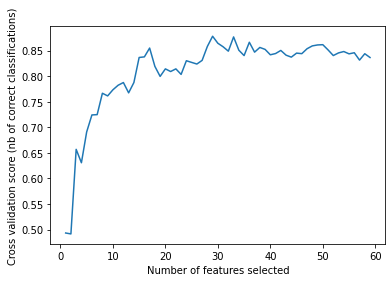

In [30]:
kf = KFold(n_splits=9, random_state=None, shuffle=False)
model = SGDClassifier()
rfecv = RFECV(estimator=model, cv=kf,scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [31]:
selected = rfecv.support_

In [32]:
num = 0
todelete = []
for i in selected:
  if i ==False:
    todelete.append(num)
    num += 1

In [33]:
X_train_selected = X_train.drop(X_train.columns[todelete], axis=1)

In [34]:
X_test_selected = X_test.drop(X_test.columns[todelete], axis=1)

In [35]:
kf = KFold(n_splits=9, random_state=None, shuffle=False)
params = {'loss':['hinge', 'log', 'modified_huber'], 'penalty':['l1', 'l2', 'elasticnet'], 'alpha': [0.1, 0.05, 0.001]}
clf = SGDClassifier()
gs = GridSearchCV(clf, cv=kf, param_grid=params, return_train_score=True)

gs.fit(X_train_selected, y_train)

GridSearchCV(cv=KFold(n_splits=9, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.05, 0.001],
                         'loss': ['hinge', 'log', 'modified_huber'],
                       

In [36]:
#Visualizing the results of grid search
gs.cv_results_

{'mean_fit_time': array([0.14614823, 0.08189943, 0.14712172, 0.24246727, 0.14200648,
        0.21135306, 0.53987413, 0.1383423 , 0.24635985, 0.15842178,
        0.0822325 , 0.14320781, 0.2295529 , 0.14323592, 0.21036185,
        0.74682071, 0.16696713, 0.31316262, 0.37770531, 0.15258121,
        0.26870656, 0.48036263, 0.21188898, 0.31079761, 2.6169414 ,
        0.46771317, 0.95938616]),
 'mean_score_time': array([0.00158906, 0.0020562 , 0.00171116, 0.00156591, 0.00153915,
        0.00156493, 0.00160321, 0.00153859, 0.00157351, 0.00152021,
        0.00206992, 0.00152686, 0.00157287, 0.00154246, 0.0015605 ,
        0.00158678, 0.00154376, 0.00155796, 0.00154736, 0.00153732,
        0.00155814, 0.00157589, 0.0015924 , 0.00155335, 0.00158683,
        0.00155542, 0.00156246]),
 'mean_test_score': array([0.58903704, 0.71037037, 0.72814815, 0.74511111, 0.73962963,
        0.73925926, 0.69733333, 0.72792593, 0.70822222, 0.756     ,
        0.71355556, 0.73562963, 0.77762963, 0.74533333, 0.735

In [37]:
#Best parameters
gs.best_params_

{'alpha': 0.05, 'loss': 'log', 'penalty': 'l1'}

In [38]:
#Best score
gs.best_score_

0.7776296296296297

In [39]:
#Training the model with the best parameters
bestclf = SGDClassifier(alpha= 0.05, loss= 'log', penalty= 'l1')
bestclf.fit(X_train_selected, y_train)
tr_p = bestclf.predict(X_train_selected)
print(accuracy_score(y_train, tr_p))
confusion_matrix(y_train, tr_p)

0.831925925925926


array([[2775,    0,    9,    0,    0],
       [   8, 1764,    5,  290,  515],
       [  91,    2, 2146,  407,    3],
       [   0,    5,   56, 2389,   26],
       [ 139,  539,    5,  169, 2157]])

In [40]:
#Running the model on the test set
predictions = bestclf.predict(X_test_selected)
print(accuracy_score(y_test, predictions))
confusion_matrix(y_test, predictions)

0.7237783781221859


array([[4406,   37,   12,    0,   11],
       [   0, 3386,   31,  172,  813],
       [2704,   13, 1919,   95,   48],
       [   0,  223,    0, 2989,  702],
       [   0,   60,   10,  897, 2571]])